In [8]:
# -*- coding: utf-8 -*-
"""
Created on Sat Dec 22 01:20:22 2018

@author: Jeff
"""
import torch
import numpy as np
import glob
import os
import cv2
import pandas as pd
import json
import argparse
import Model

def get_feature_two_hots(descr):
    if os.path.isfile('./feature_dicts.json'):
        with open('./feature_dicts.json', 'r') as f:
            hair_dict, eye_dict = json.load(f)
    else:
        tag = np.array(pd.read_csv('../hw3-1/data/extra_data/tags.csv'))
        tag_head = np.array(['aqua hair aqua eyes'])
        tags = np.insert(tag[:,1], 0, values=tag_head, axis=0)
        print(tags)
        # get two feature of img: eye color and hair color
        hair_set = set()
        eye_set = set()
        for it in tags:
            tmp = it.split(' ')
            hair_set.add(tmp[0])
            eye_set.add(tmp[2])
        hair_dict = {}
        eye_dict = {}
        i = 0
        for it in hair_set:
            hair_dict[it] = i
            i = i + 1
        i = 0
        for it in eye_set:
            eye_dict[it] = i
            i = i + 1
        with open('feature_dicts.list', 'w') as f:
            json.dump([hair_dict, eye_dict], f)
    
    tmp = descr.split(' ')
    assert tmp[1] == 'hair' and tmp[3] == 'eyes'
    hair = np.zeros(len(hair_dict))
    hair[hair_dict[tmp[0]]] = 1
    eye = np.zeros(len(eye_dict))
    eye[eye_dict[tmp[2]]] = 1
    return [hair,eye]

def save_imgs(model, output_path):
    import matplotlib.pyplot as plt
    %matplotlib inline
    #%matplotlib notebook

    #plt.switch_backend('TkAgg')

    r, c = 5, 5
    # z = torch.randn((c_z.shape[0], self.z_dim), dtype=torch.float32).cuda()
    noise = np.random.normal(0, 1, (r * c, model.z_dim))
    noise = torch.Tensor(noise).cuda()
    noise = (noise/torch.norm(noise,dim=1,keepdim=True)).cuda()
    
    # gen_imgs should be shape (25, 64, 64, 3)

    with open('./testing_tags.txt', 'r') as f:
        Ttags = f.readlines()
        Ttags = [i.split('\n')[0].split(',') for i in Ttags]
        Ttags = dict([int(j[0]), j[1]] for j in Ttags)
    
    _feat = []
    for p in range(25):
        _hair, _eyes = get_feature_two_hots(Ttags[p + 1])
        _hair, _eyes = torch.Tensor(_hair), torch.Tensor(_eyes)
        _feat.append(torch.cat((_hair, _eyes)))
    _feat = torch.stack(_feat).cuda()
    
    
    gen_imgs = model.infer(c_z=_feat, noise_z=noise)*255
    gen_imgs = gen_imgs.permute(0, 2, 3, 1)
    gen_imgs = gen_imgs.cpu().data.numpy().astype(np.uint8)
    #print(gen_imgs[0]==gen_imgs[1])
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs[cnt, :,:,:])
            axs[i,j].axis('off')
            cnt += 1
    plt.show()
    fig.savefig(output_path)
    plt.close()

def main(model_name='./GAN_default.pkl', output_path='output.png'):
    model = torch.load(model_name)
    model = model.eval()
    if os.path.isfile(output_path):
        os.remove(output_path)
    save_imgs(model, output_path) 
    return 0

def ensemble(output_path='output.png'):
    model1 = torch.load('./test_N.pkl')
    model2 = torch.load('./test_N2.pkl')
    model3 = torch.load('./test_N3.pkl')
    model4 = torch.load('./test_N4.pkl')
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    #%matplotlib notebook

    #plt.switch_backend('TkAgg')

    r, c = 5, 5
    # z = torch.randn((c_z.shape[0], self.z_dim), dtype=torch.float32).cuda()
    noise = np.random.normal(0, 1, (r * c, model1.z_dim))
    noise = torch.Tensor(noise).cuda()
    noise = (noise/torch.norm(noise,dim=1,keepdim=True)).cuda()
    
    # gen_imgs should be shape (25, 64, 64, 3)

    with open('./testing_tags.txt', 'r') as f:
        Ttags = f.readlines()
        Ttags = [i.split('\n')[0].split(',') for i in Ttags]
        Ttags = dict([int(j[0]), j[1]] for j in Ttags)
    
    _feat = []
    for p in range(25):
        _hair, _eyes = get_feature_two_hots(Ttags[p + 1])
        _hair, _eyes = torch.Tensor(_hair), torch.Tensor(_eyes)
        _feat.append(torch.cat((_hair, _eyes)))
    _feat = torch.stack(_feat).cuda()
    
    
    gen_imgs1 = model1.infer(c_z=_feat, noise_z=noise)*255
    gen_imgs1 = gen_imgs1.permute(0, 2, 3, 1)
    gen_imgs1 = gen_imgs1.cpu().data.numpy().astype(np.uint8)
    
    gen_imgs2 = model2.infer(c_z=_feat, noise_z=noise)*255
    gen_imgs2 = gen_imgs2.permute(0, 2, 3, 1)
    gen_imgs2 = gen_imgs2.cpu().data.numpy().astype(np.uint8)
    
    gen_imgs3 = model3.infer(c_z=_feat, noise_z=noise)*255
    gen_imgs3 = gen_imgs3.permute(0, 2, 3, 1)
    gen_imgs3 = gen_imgs3.cpu().data.numpy().astype(np.uint8)
    
    gen_imgs4 = model4.infer(c_z=_feat, noise_z=noise)*255
    gen_imgs4 = gen_imgs4.permute(0, 2, 3, 1)
    gen_imgs4 = gen_imgs4.cpu().data.numpy().astype(np.uint8)
    
    gen_imgs5 = model1.infer(c_z=_feat, noise_z=noise)*255
    gen_imgs5 = gen_imgs5.permute(0, 2, 3, 1)
    gen_imgs5 = gen_imgs5.cpu().data.numpy().astype(np.uint8)
    
    gen_imgs_list = [gen_imgs1,gen_imgs2,gen_imgs3,gen_imgs4,gen_imgs5]
    #print(gen_imgs[0]==gen_imgs[1])
    fig, axs = plt.subplots(r, c)
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i,j].imshow(gen_imgs_list[j][cnt, :,:,:])
            axs[i,j].axis('off')
            cnt += 1
    plt.show()
    fig.savefig(output_path)
    plt.close()
    

# if __name__ == '__main__':
#     parser = argparse.ArgumentParser(description='Conditional GAN HW3-2')
#     parser.add_argument("model", type=str)
#     parser.add_argument("output", type=str)
#     args = parser.parse_args()
#     main(args)


In [13]:
import matplotlib.pyplot as plt
plt.get_backend()
os.getcwd()

'/project/ntulee/b05901009/hw3-2'

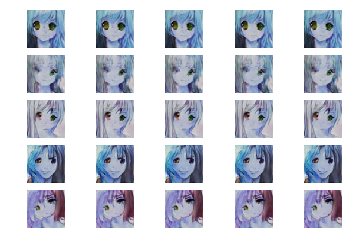

0

In [11]:
main(model_name='./Models/test_N4.pkl', output_path='Wei_test5.png')

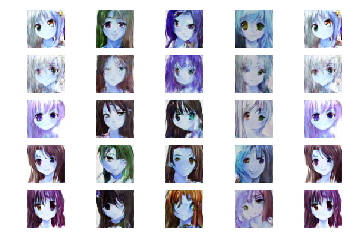

In [10]:
ensemble( output_path='Wei_ens.png')